<a href="https://colab.research.google.com/github/Yahred/evolutionary-computation/blob/main/CGAFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aproximación de una función con un algoritmo genético compacto

Cargamos los módulos necesarios

In [3]:
import json
import math

import matplotlib.pyplot as plt
import numpy as np

from urllib.request import urlopen

Cargamos los puntos de la función, almacenados en un archivo .json

In [4]:
path = 'https://raw.githubusercontent.com/Yahred/evolutionary-computation/main/data/function_points.json'
archivo = urlopen(path).read()
puntos = json.loads(archivo)

Cargamos los puntos en X y Y

In [5]:
x_puntos = puntos['x_puntos']
y_puntos = puntos['y_puntos']

Echemos un ojo a la función

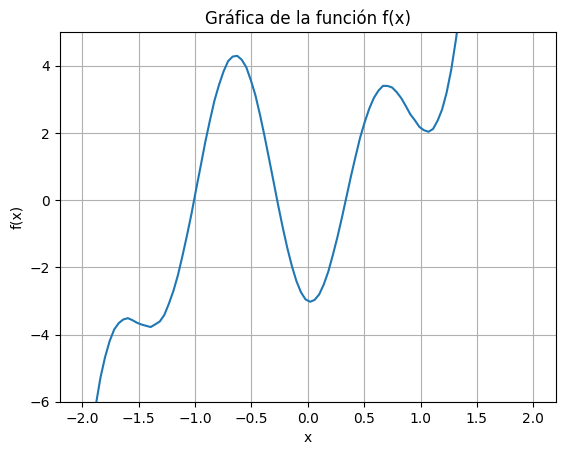

In [6]:
plt.plot(x_puntos, y_puntos)
plt.ylim(-6, 5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la función f(x)')
plt.grid(True)
plt.show()

# Definción del cromosoma

Antes de definir la función fitness debemos establecer como será el cromosoma de nuestros individuos, en esto caso el individuo tendra cuatro genes por cada coeficiente lo cual nos resulta en un individuo de 20 genes en el que cada nibble representa un coeficiente.

In [8]:
def fitness(individuo: str):
    coeficientes = []
    for i in range(len(individuo), 4):
      bin = individuo[i : i+4]
      coeficiente = int(bin, 2)
      coeficientes.append(coeficiente)

    a, b, c, d, e = coeficientes
    def funcion(x):
      return a*x**3 + b*x**2 - c * x - d * math.cos(e*x)

    aprox = np.array([funcion(x) for x in x_puntos])
    error = np.sum((np.array(y_puntos) - aprox)**2) / len(x_puntos)

    return error,
